# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../../data/"

# Data

In [3]:
df_clinical = pd.read_excel(data_path + "clinical_data.xls")
df_clinical.replace("[Not Available]", np.nan, inplace=True)

target_class = pd.read_csv(data_path + 'target_class.csv')
target_class.rename(columns={'CLID': 'bcr_patient_barcode'}, inplace=True)

/tmp/ipykernel_904/4204279962.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clinical.replace("[Not Available]", np.nan, inplace=True)


In [4]:
data = pd.merge(df_clinical, target_class, on='bcr_patient_barcode', how='inner')
data['Pam50.Call'] = data['Pam50.Call'].astype('category')
data

bcr_patient_barcode  age_at_initial_pathologic_diagnosis  \
0         TCGA-E2-A109                                   64   
1         TCGA-E2-A10F                                   47   
2         TCGA-BH-A0HY                                   60   
3         TCGA-BH-A0DT                                   41   
4         TCGA-BH-A18F                                   50   
..                 ...                                  ...   
71        TCGA-BH-A0BG                                   73   
72        TCGA-BH-A0B5                                   40   
73        TCGA-BH-A202                                   60   
74        TCGA-BH-A0B6                                   47   
75        TCGA-AO-A0JM                                   40   

   ajcc_cancer_metastasis_stage_code ajcc_neoplasm_disease_lymph_node_stage  \
0                                 M0                                N0 (i-)   
1                                 M0                                N0 (i-)   
2                                 M0                                     N0   
3                                 M0                                    N1a   
4                                 M0                                     N0   
..                               ...                                    ...   
71                                M0                                     N0   
72                                M0                                    N2a   
73                                M0                                     N0   
74                                M0                                     N0   
75                                M0                                     N1   

   ajcc_neoplasm_disease_stage ajcc_tumor_stage_code  \
0                    Stage IIA                    T2   
1                    Stage IIA                    T2   
2                      Stage I                   T1c   
3                    Stage IIA                   T1c   
4                    Stage IIA                    T2   
..                         ...                   ...   
71                     Stage I                    T1   
72                  Stage IIIA                    T2   
73                    Stage II                    T2   
74                     Stage I                   T1c   
75                   Stage IIB                    T2   

                           anatomic_organ_subdivision  \
0                          Right Upper Outer Quadrant   
1                           Left Upper Outer Quadrant   
2                                                Left   
3                                               Right   
4                          Right Lower Outer Quadrant   
..                                                ...   
71                          Left Lower Outer Quadrant   
72                                               Left   
73                                               Left   
74                          Left Upper Outer Quadrant   
75  Right Lower Inner Quadrant|Right Lower Outer Q...   

                axillary_lymph_node_stage_method_type  \
0                          Sentinel node biopsy alone   
1                          Sentinel node biopsy alone   
2                                                 NaN   
3                                                 NaN   
4                          Sentinel node biopsy alone   
..                                                ...   
71                                                NaN   
72                                                NaN   
73                                                NaN   
74                                                NaN   
75  Sentinel lymph node biopsy plus axillary disse...   

   breast_cancer_optical_measurement_histologic_type  \
0                                Infiltrating Ductal   
1                               Infiltrating Lobular   
2                                Infiltrating Ductal   
3                             

# Exploratory analysis

## Missing data

In [29]:
print("\nValores faltantes por columna:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Valores faltantes por columna:
axillary_lymph_node_stage_method_type     21
breast_cancer_surgery_margin_status       72
her2_immunohistochemistry_level_result    34
lymph_node_examined_count                  1
margin_status                              3
menopause_status                           3
number_of_lymphnodes_positive_by_he        1
race                                       1
dtype: int64


## Clinical data

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


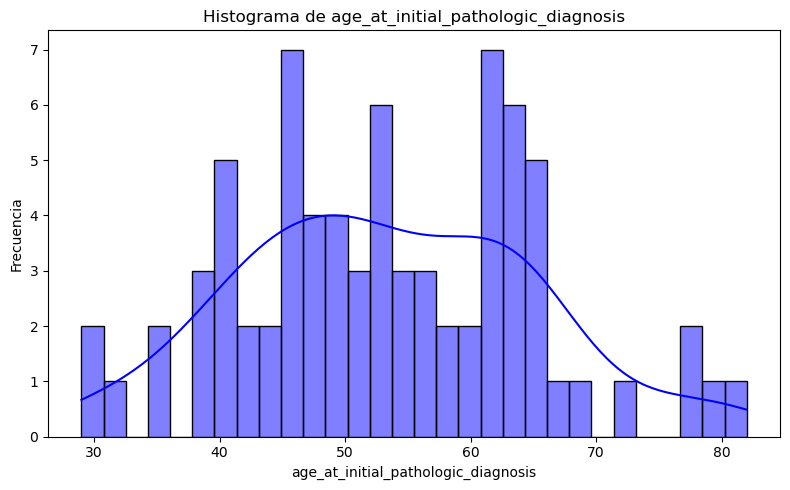

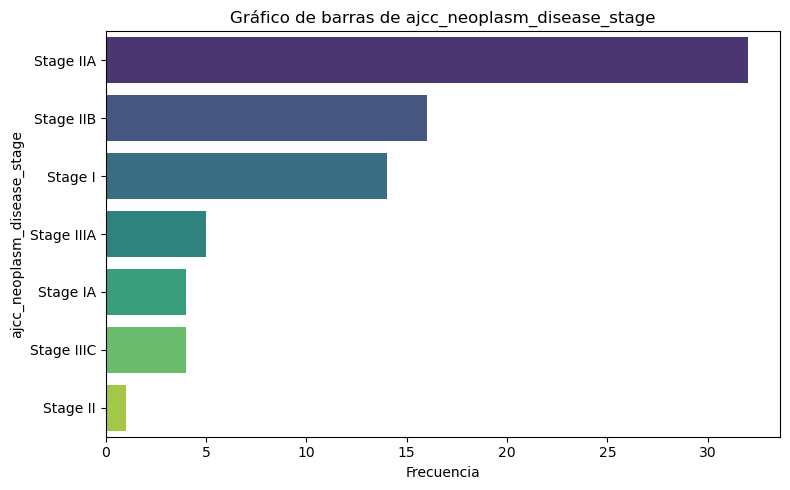

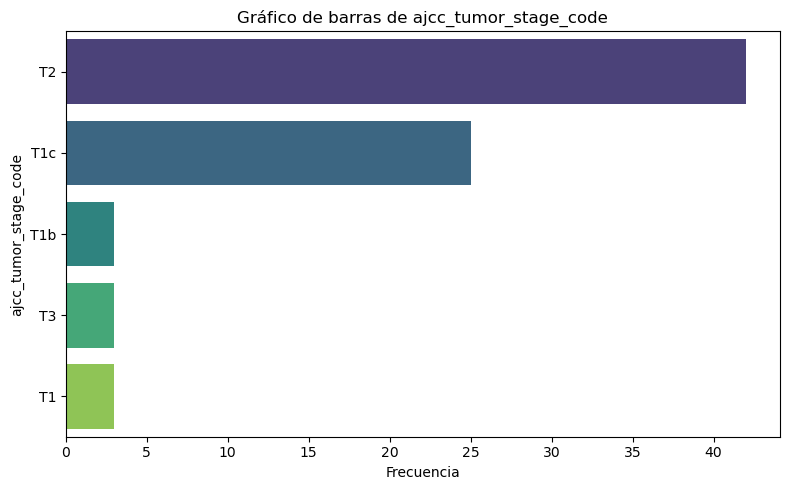

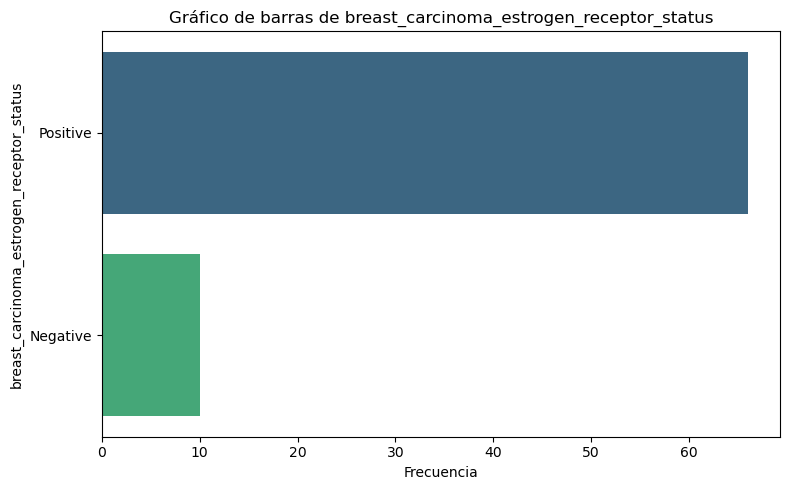

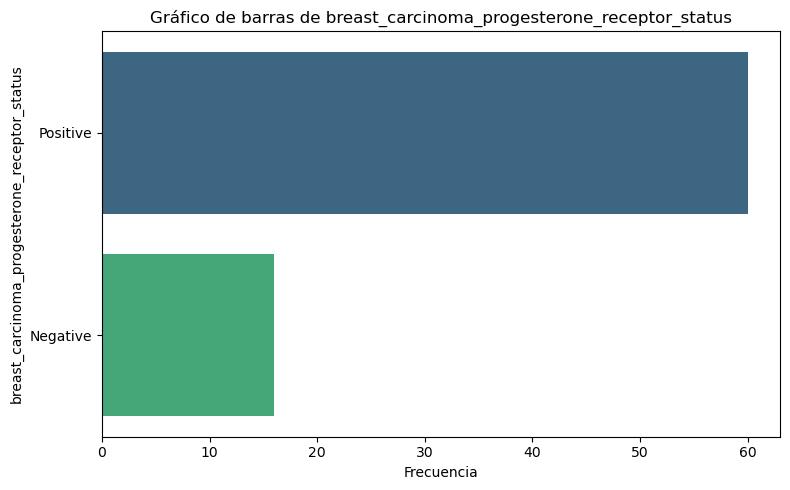

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


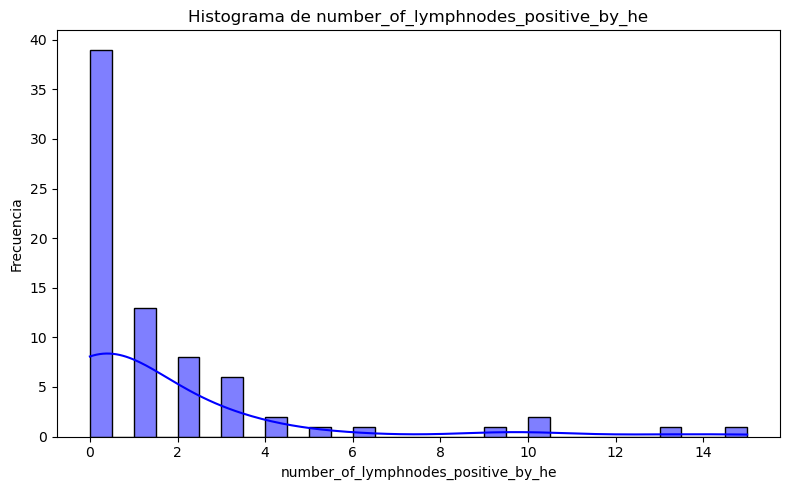

In [35]:
excluded_columns = ['bcr_patient_barcode', 'patient_id', 'Pam50.Call']
columns_to_plot = [col for col in data.columns if col not in excluded_columns]

# Iterar sobre las columnas para graficar
for column in columns_to_plot:
    if column in ["age_at_initial_pathologic_diagnosis", "ajcc_neoplasm_disease_stage",
                  "ajcc_tumor_stage_code", "breast_carcinoma_estrogen_receptor_status",
                  "breast_carcinoma_progesterone_receptor_status",
                  "number_of_lymphnodes_positive_by_he"]:
        plt.figure(figsize=(8, 5))

        # Verificar si la columna es numérica o categórica
        if pd.api.types.is_numeric_dtype(data[column]):
            # Histograma para columnas numéricas
            sns.histplot(data[column], kde=True, bins=30, color='blue', edgecolor='black')
            plt.title(f"Histograma de {column}")
            plt.xlabel(column)
            plt.ylabel("Frecuencia")
        else:
            # Gráfico de barras para columnas categóricas
            sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)
            plt.title(f"Gráfico de barras de {column}")
            plt.xlabel("Frecuencia")
            plt.ylabel(column)

        # Mostrar el gráfico
        plt.tight_layout()
        plt.show()

## Relación de las varibles con Pam50.call

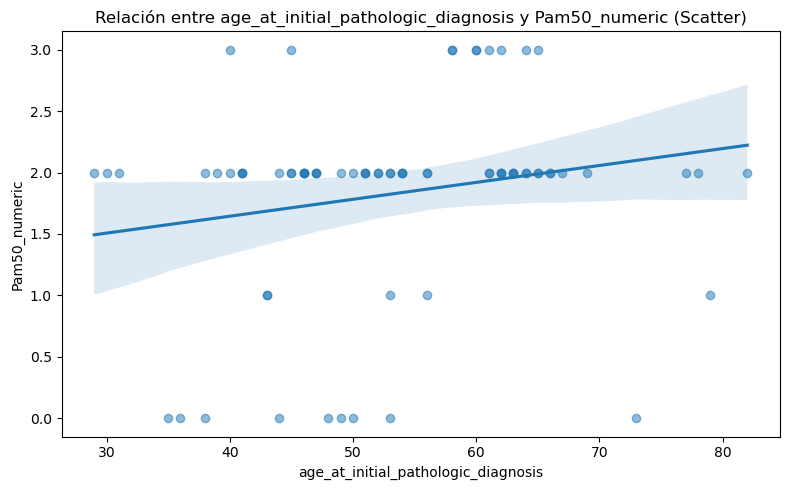

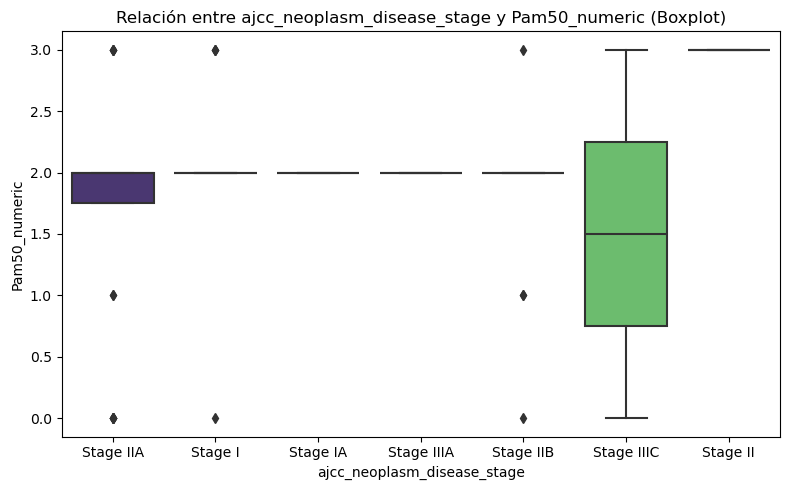

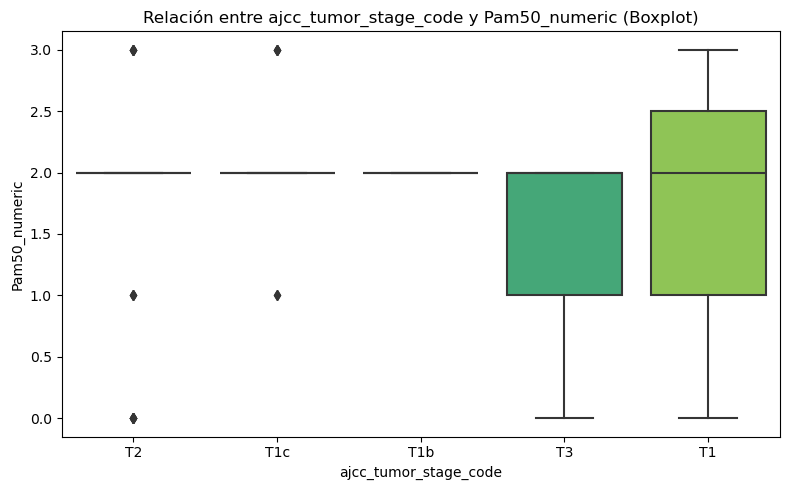

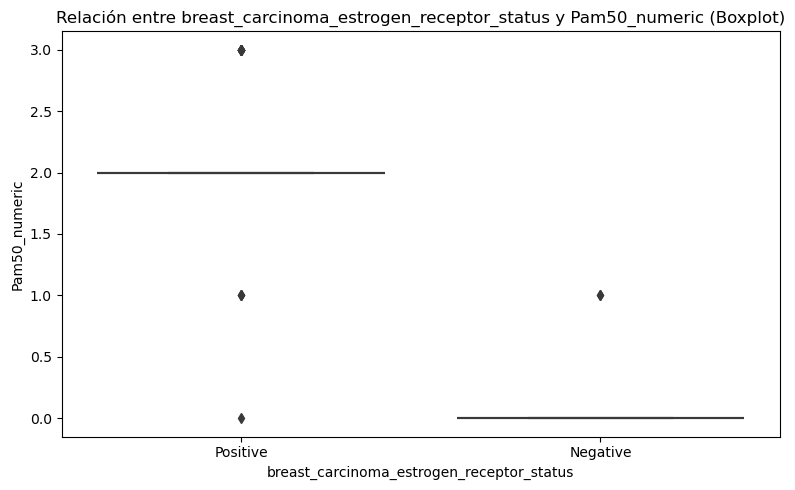

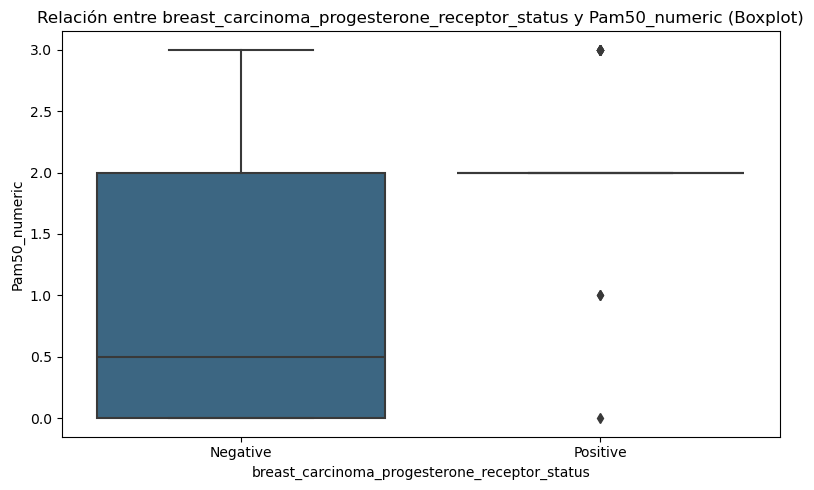

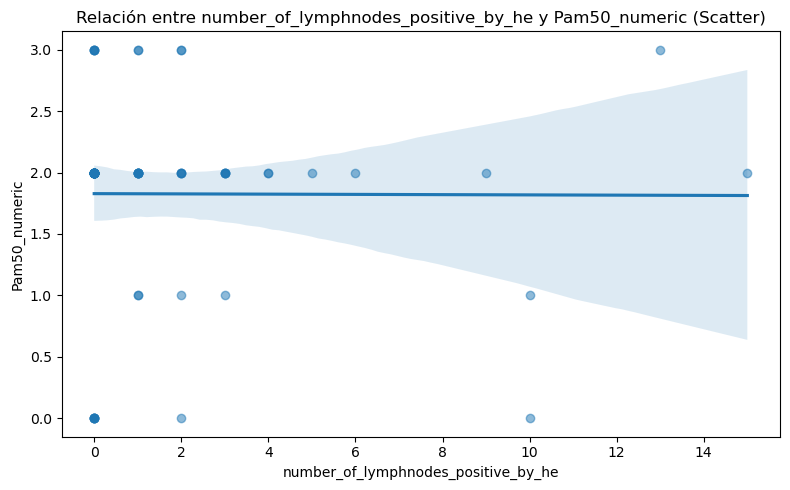

In [36]:
data['Pam50_numeric'] = data['Pam50.Call'].cat.codes

excluded_columns = ['bcr_patient_barcode', 'patient_id', 'Pam50.Call']
columns_to_plot = [col for col in data.columns if col not in excluded_columns]

for column in columns_to_plot:
    if column in ["age_at_initial_pathologic_diagnosis", "ajcc_neoplasm_disease_stage",
                  "ajcc_tumor_stage_code", "breast_carcinoma_estrogen_receptor_status",
                  "breast_carcinoma_progesterone_receptor_status",
                  "number_of_lymphnodes_positive_by_he"]:
        plt.figure(figsize=(8, 5))
        
        if pd.api.types.is_numeric_dtype(data[column]):
            sns.regplot(x=data[column], y=data['Pam50_numeric'], scatter_kws={'alpha': 0.5})
            plt.title(f"Relación entre {column} y Pam50_numeric (Scatter)")
            plt.xlabel(column)
            plt.ylabel("Pam50_numeric")
        else:
            sns.boxplot(x=data[column], y=data['Pam50_numeric'], palette='viridis')
            plt.title(f"Relación entre {column} y Pam50_numeric (Boxplot)")
            plt.xlabel(column)
            plt.ylabel("Pam50_numeric")
        
        plt.tight_layout()
        plt.show()

# Razonamiento

### Variables y su relevancia para el modelo

#### 1. `age_at_initial_pathologic_diagnosis`
**Significado:** Edad del paciente al momento del diagnóstico patológico inicial del cáncer.  
**Relevancia para el modelo:**  
La edad es un factor pronóstico clave en cáncer de mama. Las mujeres más jóvenes suelen tener tumores más agresivos, mientras que las mujeres mayores pueden tener subtipos menos agresivos. Además, la edad puede influir en las decisiones de tratamiento y en la respuesta a terapias, mejorando la precisión del modelo para predecir el subtipo molecular o el pronóstico.

#### 2. `ajcc_neoplasm_disease_stage`
**Significado:** Etapa global del cáncer según el sistema AJCC (American Joint Committee on Cancer), que clasifica el cáncer en etapas (I, II, III, IV) basadas en el tamaño del tumor, la afectación de ganglios linfáticos y metástasis.  
**Relevancia para el modelo:**  
El estadio del cáncer es uno de los factores pronósticos más importantes. Un estadio más avanzado generalmente se asocia con un peor pronóstico y mayor necesidad de tratamientos agresivos. Esta variable impacta directamente en la clasificación y el tratamiento del cáncer, siendo crucial para predecir los subtipos moleculares y la evolución de la enfermedad.

#### 3. `ajcc_tumor_stage_code`
**Significado:** Código que describe el tamaño y la extensión local del tumor según el sistema AJCC.  
**Ejemplo:** `T0` (sin tumor), `T1` (tumor pequeño), `T4` (tumor grande e invasivo).  
**Relevancia para el modelo:**  
El tamaño del tumor (`T`) es un predictor crucial del pronóstico. Tumores más grandes o invasivos tienen una mayor probabilidad de metastatizarse o recurrir. Esta variable establece el grado de agresividad de la enfermedad y ayuda a predecir el tipo de cáncer más probable (por ejemplo, Luminal A frente a Basal-like).

#### 4. `breast_carcinoma_estrogen_receptor_status`
**Significado:** Estado del receptor de estrógeno en las células cancerosas (positivo o negativo).  
- **Positivo:** el cáncer crece en respuesta al estrógeno.  
- **Negativo:** el cáncer no depende del estrógeno para crecer.  
**Relevancia para el modelo:**  
El receptor de estrógeno es un biomarcador clave en el cáncer de mama. Los tumores positivos para este receptor responden bien a tratamientos hormonales (como tamoxifeno), mejorando el pronóstico. Esta variable es esencial para clasificar los subtipos moleculares y para predecir el tratamiento más adecuado.

#### 5. `breast_carcinoma_progesterone_receptor_status`
**Significado:** Estado del receptor de progesterona en las células cancerosas (positivo o negativo).  
- Similar al receptor de estrógeno, el cáncer de mama con receptores de progesterona positivos también responde bien a terapias hormonales.  
**Relevancia para el modelo:**  
Al igual que el receptor de estrógeno, el receptor de progesterona es otro marcador que indica la posibilidad de tratar el cáncer con terapia hormonal. Es fundamental para clasificar los subtipos de cáncer y prever la respuesta a tratamientos hormonales.

#### 6. `number_of_lymphnodes_positive_by_he`
**Significado:** Número de ganglios linfáticos afectados por el cáncer según el análisis histológico con hematoxilina-eosina (HE).  
**Relevancia para el modelo:**  
El número de ganglios linfáticos afectados es uno de los factores más importantes en la estadificación del cáncer y tiene un impacto directo en el pronóstico. La presencia de ganglios positivos aumenta el riesgo de metástasis, lo que indica un cáncer más avanzado y con mayor probabilidad de recurrencia. Esta variable es clave para clasificar el cáncer y predecir el pronóstico.

Ninugno de estos es predictor directo, como si lo es `her2_immunohistochemistry_level_result`